# Kaggle Competition: Loan Payment Prediction

###  Problem Statement: Produce a supervised machine learning model to predict whether a loan will be paid in full or charged off

## Step One: Data processing and cleaning

make the cell a markdown

In [2]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import datetime as dt

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
%matplotlib inline

Packages for model build:

In [3]:
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, auc

Load the data to Pandas:

In [4]:
df = pd.read_csv('CaseStudy_Dataset.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df.head(5)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  NaN        NaN     5000.0       5000.0           4975.0   36 months   
1  NaN        NaN     2500.0       2500.0           2500.0   60 months   
2  NaN        NaN     2400.0       2400.0           2400.0   36 months   
3  NaN        NaN    10000.0      10000.0          10000.0   36 months   
4  NaN        NaN     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  11-Dec   Fully Paid   
1           RENT     30000.0     Source Verified  11-Dec  Charged Off   
2           RENT     12252.0        Not Verified  11-Dec   Fully Paid   
3           RENT     49200.0     Source Verified  11-Dec   Fully Paid   
4           RENT     80000.0     Source Verified  11-Dec   Fully Paid   

  pymnt_plan  url                                               desc  \
0          n  NaN    Borrower added on 12/22/11 > I need to upgra...   
1          n  NaN    Borrower added on 12/22/11 > I plan to use t...   
2          n  NaN                                                NaN   
3          n  NaN    Borrower added on 12/21/11 > to pay for prop...   
4          n  NaN    Borrower added on 12/21/11 > I plan on combi...   

          purpose                 title zip_code addr_state    dti  \
0     credit_card              Computer    860xx         AZ  27.65   
1             car                  bike    309xx         GA   1.00   
2  small_business  real estate business    606xx         IL   8.72   
3           other              personel    917xx         CA  20.00   
4           other              Personal    972xx         OR  17.94   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0          0.0           Jan-85             1.0                     NaN   
1          0.0           Apr-99             5.0                     NaN   
2          0.0            1-Nov             2.0                     NaN   
3          0.0           Feb-96             1.0                    35.0   
4          0.0           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN       3.0      0.0    13648.0     83.70%        9.0   
1                     NaN       3.0      0.0     1687.0      9.40%        4.0   
2                     NaN       2.0      0.0     2956.0     98.50%       10.0   
3                     NaN      10.0      0.0     5598.0        21%       37.0   
4                     NaN      15.0      0.0    27783.0     53.90%       38.0   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f        0.0            0.0   5863.155187   
1                   f        0.0            0.0   1014.530000   
2                   f        0.0            0.0   3005.666844   
3                   f        0.0            0.0  12231.890000   
4                   f        0.0            0.0   4066.908161   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16                0.00   
1          1014.53           456.46         435.17                0.00   
2          3005.67          2400.00         605.67                0.00   
3         12231.89         10000.00        2214.92               16.97   
4          4066.91          3000.00        1066.91                0.00   

   recoveri

In [7]:
df.shape

(42545, 144)

Check the column information:

In [10]:
list(df.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

Check the target variable - loan_status by using value_counts():

In [11]:
df['loan_status'].value_counts()

Fully Paid                                             34121
Charged Off                                             5672
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

Usually for loan applications which **didn't meet credit policy**, they should be declined directly before sent to the model.
Although, in this case these loans still had 'Status' information, we **would remove these records from build model and assume these loans won't be processed by the model** 

Only keep records which passed credit policy:

In [13]:
df = df.loc[df['loan_status'].isin(['Fully Paid','Charged Off'])]
df['loan_status'].value_counts()

Fully Paid     34121
Charged Off     5672
Name: loan_status, dtype: int64

Fully Paid     34121
Charged Off     5672
Name: loan_status, dtype: int64

Define a function to check missing values:

In [14]:
def missing_values_table(df):
        #1 Total missing values
        mis_val = df.isnull().sum()
        
        #2 Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        #3 Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        #4 Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        #5 Only keep the columns with missing values
        mis_val_table_only = mis_val_table_ren_columns.loc[mis_val_table_ren_columns['% of Total Values'] > 0]
        
        #6 Return the dataframe with missing information
        return mis_val_table_only

In [15]:
missing_values_table(df)

Missing Values  % of Total Values
id                                                   39793         100.000000
member_id                                            39793         100.000000
emp_title                                             2468           6.202096
emp_length                                            1078           2.709019
url                                                  39793         100.000000
desc                                                 12969          32.591159
title                                                   11           0.027643
mths_since_last_delinq                               25733          64.667153
mths_since_last_record                               37002          92.986204
revol_util                                              50           0.125650
last_pymnt_d                                            71           0.178423
next_pymnt_d                                         39793         100.000000
last_credit_pull_d                                       2           0.005026
collections_12_mths_ex_med                              56           0.140728
mths_since_last_major_derog                          39793         100.000000
annual_inc_joint                                     39793         100.000000
dti_joint                                            39793         100.000000
verification_status_joint                            39793         100.000000
tot_coll_amt                                         39793         100.000000
tot_cur_bal                                          39793         100.000000
open_acc_6m                                          39793         100.000000
open_act_il                                          39793         100.000000
open_il_12m                                          39793         100.000000
open_il_24m                                          39793         100.000000
mths_since_rcnt_il                                   39793         100.000000
total_bal_il                                         39793         100.000000
il_util                                              39793         100.000000
open_rv_12m                                          39793         100.000000
open_rv_24m                                          39793         100.000000
max_bal_bc                                           39793         100.000000
all_util                                             39793         100.000000
total_rev_hi_lim                                     39793         100.000000
inq_fi                                               39793         100.000000
total_cu_tl                                          39793         100.000000
inq_last_12m                                         39793         100.000000
acc_open_past_24mths                                 39793         100.000000
avg_cur_bal                                          39793         100.000000
bc_open_to_buy                                       39793         100.000000
bc_util                                              39793         100.000000
chargeoff_within_12_mths                                56           0.140728
mo_sin_old_il_acct                                   39793         100.000000
mo_sin_old_rev_tl_op                                 39793         100.000000
mo_sin_rcnt_rev_tl_op                                39793         100.000000
mo_sin_rcnt_tl                                       39793         100.000000
mort_acc                                             39793         100.000000
mths_since_recent_bc                                 39793         100.000000
mths_since_recent_bc_dlq                             39793         100.000000
mths_since_recent_inq                                39793         100.000000
mths_since_recent_revol_delinq                       39793         100.000000
num_accts_ever_120_pd                                39793         100.000000
num_actv_bc_tl                                       39793        

Practice:

Let's break down this function into small pieces and run each step
one by one to better understand it

In [239]:
#Step one: Total missing values
total_mis_val = df.isnull().sum()

In [240]:
#Step two: Percentage of missing values
perc_mis_val = 100 * df.isnull().sum()/len(df)

In [241]:
#Step three: Make a table with the results
     #pd.concat - Concatenate pandas objects along a particular axis (1 is by column)
mis_val_table = pd.concat([total_mis_val,perc_mis_val], axis = 1)

In [242]:
#Step four: Rename the columns
new_mis_val_table = mis_val_table.rename(columns = {0:'Missing value', 1: '% of Total Missing Value'})

In [243]:
#Step Five: Only keep the columns with missing rate > 0
mis_value_table = new_mis_val_table.loc[new_mis_val_table['% of Total Missing Value'] > 0]

In [16]:
def new_try(df):
    total_mis_val = df.isnull().sum()
    perc_mis_val = 100 * df.isnull().sum()/len(df)
    mis_val_table = pd.concat([total_mis_val,perc_mis_val], axis = 1)
    new_mis_val_table = mis_val_table.rename(columns = {0:'Missing value', 1: '% of Total Missing Value'})
    mis_value_table = new_mis_val_table.loc[new_mis_val_table['% of Total Missing Value'] > 0]
    return mis_value_table

In [17]:
aa = new_try(df)
aa

Missing value  \
id                                                  39793   
member_id                                           39793   
emp_title                                            2468   
emp_length                                           1078   
url                                                 39793   
desc                                                12969   
title                                                  11   
mths_since_last_delinq                              25733   
mths_since_last_record                              37002   
revol_util                                             50   
last_pymnt_d                                           71   
next_pymnt_d                                        39793   
last_credit_pull_d                                      2   
collections_12_mths_ex_med                             56   
mths_since_last_major_derog                         39793   
annual_inc_joint                                    39793   
dti_joint                                           39793   
verification_status_joint                           39793   
tot_coll_amt                                        39793   
tot_cur_bal                                         39793   
open_acc_6m                                         39793   
open_act_il                                         39793   
open_il_12m                                         39793   
open_il_24m                                         39793   
mths_since_rcnt_il                                  39793   
total_bal_il                                        39793   
il_util                                             39793   
open_rv_12m                                         39793   
open_rv_24m                                         39793   
max_bal_bc                                          39793   
all_util                                            39793   
total_rev_hi_lim                                    39793   
inq_fi                                              39793   
total_cu_tl                                         39793   
inq_last_12m                                        39793   
acc_open_past_24mths                                39793   
avg_cur_bal                                         39793   
bc_open_to_buy                                      39793   
bc_util                                             39793   
chargeoff_within_12_mths                               56   
mo_sin_old_il_acct                                  39793   
mo_sin_old_rev_tl_op                                39793   
mo_sin_rcnt_rev_tl_op                               39793   
mo_sin_rcnt_tl                                      39793   
mort_acc                                            39793   
mths_since_recent_bc                                39793   
mths_since_recent_bc_dlq                            39793   
mths_since_recent_inq                               39793   
mths_since_recent_revol_delinq                      39793   
num_accts_ever_120_pd                               39793   
num_actv_bc_tl                                      39793   
num_actv_rev_tl                                     39793   
num_bc_sats                                         39793   
num_bc_tl                                           39793   
num_il_tl                                           39793   
num_op_rev_tl                                       39793   
num_rev_accts                                       39793   
num_rev_tl_bal_gt_0                                 39793   
num_sats                                            39793   
num_tl_120dpd_2m                                    39793   
num_tl_30dpd                                        39793   
num_tl_90g_dpd_24m                                  39793   
num_tl_op_past_12m                                  39793   
pct_tl_nvr_dlq                                      39793   
percent_bc_gt_75                                    39793   
pub_rec_bankruptci

Apply the function to our dataframe:

In [244]:
missing=missing_values_table(df)
missing

Missing Values  % of Total Values
id                                                   39793         100.000000
member_id                                            39793         100.000000
emp_title                                             2468           6.202096
emp_length                                            1078           2.709019
url                                                  39793         100.000000
desc                                                 12969          32.591159
title                                                   11           0.027643
mths_since_last_delinq                               25733          64.667153
mths_since_last_record                               37002          92.986204
revol_util                                              50           0.125650
last_pymnt_d                                            71           0.178423
next_pymnt_d                                         39793         100.000000
last_credit_pull_d                                       2           0.005026
collections_12_mths_ex_med                              56           0.140728
mths_since_last_major_derog                          39793         100.000000
annual_inc_joint                                     39793         100.000000
dti_joint                                            39793         100.000000
verification_status_joint                            39793         100.000000
tot_coll_amt                                         39793         100.000000
tot_cur_bal                                          39793         100.000000
open_acc_6m                                          39793         100.000000
open_act_il                                          39793         100.000000
open_il_12m                                          39793         100.000000
open_il_24m                                          39793         100.000000
mths_since_rcnt_il                                   39793         100.000000
total_bal_il                                         39793         100.000000
il_util                                              39793         100.000000
open_rv_12m                                          39793         100.000000
open_rv_24m                                          39793         100.000000
max_bal_bc                                           39793         100.000000
all_util                                             39793         100.000000
total_rev_hi_lim                                     39793         100.000000
inq_fi                                               39793         100.000000
total_cu_tl                                          39793         100.000000
inq_last_12m                                         39793         100.000000
acc_open_past_24mths                                 39793         100.000000
avg_cur_bal                                          39793         100.000000
bc_open_to_buy                                       39793         100.000000
bc_util                                              39793         100.000000
chargeoff_within_12_mths                                56           0.140728
mo_sin_old_il_acct                                   39793         100.000000
mo_sin_old_rev_tl_op                                 39793         100.000000
mo_sin_rcnt_rev_tl_op                                39793         100.000000
mo_sin_rcnt_tl                                       39793         100.000000
mort_acc                                             39793         100.000000
mths_since_recent_bc                                 39793         100.000000
mths_since_recent_bc_dlq                             39793         100.000000
mths_since_recent_inq                                39793         100.000000
mths_since_recent_revol_delinq                       39793         100.000000
num_accts_ever_120_pd                                39793         100.000000
num_actv_bc_tl                                       39793        

Usually there are three options to deal with missing values:
 1. Imputation
 2. Create missing flag
 3. Drop columns with a high percentage of missing vlaues

We see there are a number of columns with a high percentage of missing values. 
There is no well-established threshold for removing missing values, 

and the best course of action depends on the problem. 

Here, to reduce the number of features, we will remove any columns that have greater than 80% missing rate (in real situations, the threshold can be 98%).

In [245]:
# find columns with missing > 80%
missing_columns = list(missing.index[missing['% of Total Values'] > 80])

Drop these columns with missing rate > 80%:

Missing Values  % of Total Values
emp_title                             2468           6.202096
emp_length                            1078           2.709019
desc                                 12969          32.591159
title                                   11           0.027643
mths_since_last_delinq               25733          64.667153
revol_util                              50           0.125650
last_pymnt_d                            71           0.178423
last_credit_pull_d                       2           0.005026
collections_12_mths_ex_med              56           0.140728
chargeoff_within_12_mths                56           0.140728
pub_rec_bankruptcies                   697           1.751564
tax_liens                               39           0.098007

Check duplicates in Pandas:

In [247]:
# DataFrame.duplicated(): Return boolean Series denoting duplicate rows
df2.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10        True
11        True
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       F

In [248]:
df2.loc[df2.duplicated()]

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
10        3000.0       3000.0      3000.000000   36 months   18.64%   
11        5600.0       5600.0      5600.000000   60 months   21.28%   
24670    10000.0      10000.0      9932.403848   36 months    7.51%   
24671     8400.0       8400.0      8350.000000   36 months    7.51%   
24672     7200.0       4525.0      4522.491529   60 months    6.17%   
24673    12000.0      12000.0     12000.000000   36 months   11.86%   
24674    15000.0       9875.0      9625.000000   60 months   15.95%   

       installment grade sub_grade                          emp_title  \
10          109.43     E        E1                    MKC Accounting    
11          152.39     F        F2                                NaN   
24670       311.11     A        A4                             ResMed   
24671       261.34     A        A4         Defense Language Institute   
24672        87.84     A        A3                          MARR Inc.   
24673       397.77     B        B5  Gaming Laboratories International   
24674       239.88     E        E1       Hospital for Special Surgery   

      emp_length home_ownership  annual_inc verification_status issue_d  \
10       9 years           RENT     48000.0     Source Verified  11-Dec   
11       4 years            OWN     40000.0     Source Verified  11-Dec   
24670   < 1 year       MORTGAGE     59000.0        Not Verified  10-Oct   
24671    4 years       MORTGAGE     31200.0            Verified  10-Oct   
24672    2 years           RENT     40000.0        Not Verified  10-Oct   
24673    3 years           RENT     50000.0     Source Verified  10-Oct   
24674    2 years       MORTGAGE    133900.0        Not Verified  10-Oct   

       loan_status pymnt_plan  \
10      Fully Paid          n   
11     Charged Off          n   
24670   Fully Paid          n   
24671   Fully Paid          n   
24672   Fully Paid          n   
24673  Charged Off          n   
24674   Fully Paid          n   

                                                    desc             purpose  \
10       Borrower added on 12/16/11 > Downpayment for...                 car   
11       Borrower added on 12/21/11 > I own a small h...      small_business   
24670    Borrower added on 10/17/10 > Taking out this...      small_business   
24671                                                NaN  debt_consolidation   
24672    Borrower added on 10/19/10 > I plan to use t...  debt_consolidation   
24673    Borrower added on 10/17/10 > I requested thi...  debt_consolidation   
24674                                                NaN    home_improvement   

                                          title zip_code addr_state    dti  \
10                              Car Downpayment    900xx         CA   5.35   
11         Expand Business & Buy Debt Portfolio    958xx         CA   5.55   
24670  Taking consulting business to next level    921xx         CA   0.71   
24671                                   Freedom    939xx         CA  11.35   
24672                   Debt Consolidation Loan    300xx         GA  12.45   
24673                                      Bill    087xx         NJ  21.26   
24674                          Home Improvement    115xx         NY  10.69   

       delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
10             0.0            7-Jan             2.0                     NaN   
11             0.0            4-Apr             2.0                     NaN   
24670          0.0           Dec-93             0.0                     NaN   
24671          0.0            1-Jun             1.0                     NaN   
24672          0.0           Nov-00             0.0                     NaN   
24673          0.0            5-Oct             0.0                     NaN   
24674          0.0           Feb-94             1.0                    24.0   

       open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  \
10     

Remove duplicates:

In [249]:
# DataFrame.drop_duplicates(): Return DataFrame with duplicate rows removed
  # inplace (bool, default False): Whether to drop duplicates in place or to return a copy
df2.drop_duplicates(inplace= True)
df2.shape

(39786, 54)

## Step Two: Exploratory Data Analysis

###### 2.1 Check whether the data is balanced or imbalanced

Practice:
1. Encode the target variable as 1 for 'Charged Off' and 0 for 'Fully Paid':
2. Calculate the charge off rate:

14.251244156235861

##### 2.2 Drop Columns May Cause Data Leakge

In [252]:
data_leakage_cols = ['funded_amnt','funded_amnt_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
                     'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
                     'last_pymnt_amnt','chargeoff_within_12_mths','debt_settlement_flag']

In [253]:
df2.drop(columns=data_leakage_cols, inplace=True)

##### 2.3 Explore numerical features

Basic descriptive statistics view:

loan_amnt   installment    annual_inc           dti   delinq_2yrs  \
count  39786.000000  39786.000000  3.978600e+04  39786.000000  39786.000000   
mean   11231.360277    324.733637  6.897907e+04     13.317794      0.146534   
std     7464.542832    208.923212  6.376263e+04      6.678300      0.491826   
min      500.000000     15.690000  4.000000e+03      0.000000      0.000000   
25%     5500.000000    167.080000  4.050000e+04      8.180000      0.000000   
50%    10000.000000    280.610000  5.900000e+04     13.410000      0.000000   
75%    15000.000000    430.780000  8.234250e+04     18.600000      0.000000   
max    35000.000000   1305.190000  6.000000e+06     29.990000     11.000000   

       inq_last_6mths  mths_since_last_delinq      open_acc       pub_rec  \
count    39786.000000            14059.000000  39786.000000  39786.000000   
mean         0.869049               35.901913      9.294023      0.055145   
std          1.070069               22.017895      4.399997      0.237653   
min          0.000000                0.000000      2.000000      0.000000   
25%          0.000000               18.000000      6.000000      0.000000   
50%          1.000000               34.000000      9.000000      0.000000   
75%          1.000000               52.000000     12.000000      0.000000   
max          8.000000              120.000000     44.000000      4.000000   

           revol_bal     total_acc  out_prncp  out_prncp_inv  \
count   39786.000000  39786.000000    39786.0        39786.0   
mean    13391.983914     22.090308        0.0            0.0   
std     15894.635107     11.401620        0.0            0.0   
min         0.000000      2.000000        0.0            0.0   
25%      3704.250000     13.000000        0.0            0.0   
50%      8859.500000     20.000000        0.0            0.0   
75%     17065.000000     29.000000        0.0            0.0   
max    149588.000000     90.000000        0.0            0.0   

       collections_12_mths_ex_med  policy_code  acc_now_delinq  delinq_amnt  \
count                     39730.0      39786.0         39786.0      39786.0   
mean                          0.0          1.0             0.0          0.0   
std                           0.0          0.0             0.0          0.0   
min                           0.0          1.0             0.0          0.0   
25%                           0.0          1.0             0.0          0.0   
50%                           0.0          1.0             0.0          0.0   
75%                           0.0          1.0             0.0          0.0   
max                           0.0          1.0             0.0          0.0   

       pub_rec_bankruptcies  tax_liens        target  
count          39089.000000    39747.0  39786.000000  
mean               0.043286        0.0      0.142512  
std                0.204381        0.0      0.349579  
min                0.000000        0.0      0.000000  
25%                0.000000        0.0      0.000000  
50%                0.000000        0.0      0.000000  
75%                0.000000        0.0      0.000000  
max                2.000000        0.0      1.000000

0.0    39786
Name: delinq_amnt, dtype: int64

Drop columns with constant values:
- collections_12_mths_ex_med
- tax_liens
- out_prncp
- out_prncp_inv
- delinq_amnt
- acc_now_delinq 

(39786, 37)

##### 2.5 Explore Categorical features

In [258]:
print(df2.info(0))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39786 entries, 0 to 39792
Data columns (total 37 columns):
loan_amnt                 39786 non-null float64
term                      39786 non-null object
int_rate                  39786 non-null object
installment               39786 non-null float64
grade                     39786 non-null object
sub_grade                 39786 non-null object
emp_title                 37319 non-null object
emp_length                38708 non-null object
home_ownership            39786 non-null object
annual_inc                39786 non-null float64
verification_status       39786 non-null object
issue_d                   39786 non-null object
loan_status               39786 non-null object
pymnt_plan                39786 non-null object
desc                      26819 non-null object
purpose                   39786 non-null object
title                     39775 non-null object
zip_code                  39786 non-null object
addr_state              

Create a separate DataFrame consisting of only categorical features:

In [259]:
df_cat=df2.select_dtypes(include=['object','category'])
df_cat.head()

term int_rate grade sub_grade                 emp_title emp_length  \
0   36 months   10.65%     B        B2                       NaN  10+ years   
1   60 months   15.27%     C        C4                     Ryder   < 1 year   
2   36 months   15.96%     C        C5                       NaN  10+ years   
3   36 months   13.49%     C        C1       AIR RESOURCES BOARD  10+ years   
4   60 months   12.69%     B        B5  University Medical Group     1 year   

  home_ownership verification_status issue_d  loan_status pymnt_plan  \
0           RENT            Verified  11-Dec   Fully Paid          n   
1           RENT     Source Verified  11-Dec  Charged Off          n   
2           RENT        Not Verified  11-Dec   Fully Paid          n   
3           RENT     Source Verified  11-Dec   Fully Paid          n   
4           RENT     Source Verified  11-Dec   Fully Paid          n   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state earliest_cr_line revol_util  \
0              Computer    860xx         AZ           Jan-85     83.70%   
1                  bike    309xx         GA           Apr-99      9.40%   
2  real estate business    606xx         IL            1-Nov     98.50%   
3              personel    917xx         CA           Feb-96        21%   
4              Personal    972xx         OR           Jan-96     53.90%   

  initial_list_status last_pymnt_d last_credit_pull_d application_type  \
0                   f       15-Jan             19-May       Individual   
1                   f       13-Apr             16-Oct       Individual   
2                   f       14-Jun             17-Jun       Individual   
3                   f       15-Jan             16-Apr       Individual   
4                   f       17-Jan             18-Apr       Individual   

  hardship_flag  
0             N  
1             N  
2             N  
3             N  
4             N

Drop the target column and create a list with all categorical columns:

In [260]:
cat_columns=list(df_cat.drop(columns=['loan_status']).columns)
cat_columns

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'pymnt_plan',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'hardship_flag']

Strip leading and trailing space of each categorical column:

In [261]:
for i in cat_columns:   
    df2[i] = df2[i].str.strip()

Quickly explore each each categorical feature and check the frequency:

In [262]:
pd.set_option('display.max_columns', None)
df2[cat_columns].head(5)

term int_rate grade sub_grade                 emp_title emp_length  \
0  36 months   10.65%     B        B2                       NaN  10+ years   
1  60 months   15.27%     C        C4                     Ryder   < 1 year   
2  36 months   15.96%     C        C5                       NaN  10+ years   
3  36 months   13.49%     C        C1       AIR RESOURCES BOARD  10+ years   
4  60 months   12.69%     B        B5  University Medical Group     1 year   

  home_ownership verification_status issue_d pymnt_plan  \
0           RENT            Verified  11-Dec          n   
1           RENT     Source Verified  11-Dec          n   
2           RENT        Not Verified  11-Dec          n   
3           RENT     Source Verified  11-Dec          n   
4           RENT     Source Verified  11-Dec          n   

                                                desc         purpose  \
0  Borrower added on 12/22/11 > I need to upgrade...     credit_card   
1  Borrower added on 12/22/11 > I plan to use thi...             car   
2                                                NaN  small_business   
3  Borrower added on 12/21/11 > to pay for proper...           other   
4  Borrower added on 12/21/11 > I plan on combini...           other   

                  title zip_code addr_state earliest_cr_line revol_util  \
0              Computer    860xx         AZ           Jan-85     83.70%   
1                  bike    309xx         GA           Apr-99      9.40%   
2  real estate business    606xx         IL            1-Nov     98.50%   
3              personel    917xx         CA           Feb-96        21%   
4              Personal    972xx         OR           Jan-96     53.90%   

  initial_list_status last_pymnt_d last_credit_pull_d application_type  \
0                   f       15-Jan             19-May       Individual   
1                   f       13-Apr             16-Oct       Individual   
2                   f       14-Jun             17-Jun       Individual   
3                   f       15-Jan             16-Apr       Individual   
4                   f       17-Jan             18-Apr       Individual   

  hardship_flag  
0             N  
1             N  
2             N  
3             N  
4             N

Check frequency:

In [263]:
for i in cat_columns:
    print(df2[i].value_counts().to_frame())

            term
36 months  29096
60 months  10690
        int_rate
10.99%       958
13.49%       831
11.49%       826
7.51%        787
7.88%        725
7.49%        656
11.71%       609
9.99%        603
7.90%        582
5.42%        573
11.99%       535
12.69%       492
10.37%       470
12.99%       449
6.03%        447
8.49%        445
12.42%       443
10.65%       435
5.79%        410
8.90%        402
7.29%        397
6.62%        396
11.86%       391
14.27%       391
10.59%       381
9.63%        378
9.91%        377
5.99%        347
7.14%        341
6.99%        336
11.11%       332
16.77%       329
12.53%       327
10.74%       312
6.54%        305
6.91%        303
8.94%        294
7.66%        292
13.61%       291
15.99%       287
13.98%       284
13.23%       263
11.12%       259
13.99%       257
6.17%        252
10.00%       251
12.68%       251
10.75%       250
10.36%       250
11.36%       247
16.49%       245
11.83%       233
18.25%       233
10.62%       228
14.65%       2

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



        revol_util
0%             980
0.20%           63
63%             62
40.70%          59
66.70%          58
0.10%           58
46.40%          57
70.40%          57
61%             57
66.60%          57
31.20%          57
65.90%          56
37.60%          56
64.80%          55
49.80%          55
57.40%          55
48.90%          55
25.50%          55
32%             54
68.60%          54
89.50%          54
75.50%          54
76.60%          54
78.70%          54
46.60%          54
51.60%          54
35.30%          54
27.20%          54
51.10%          54
64.60%          54
62.80%          53
68.70%          53
33.70%          53
34.40%          53
55.80%          53
72.10%          53
48.20%          53
54.30%          53
70.80%          53
45.60%          53
47.80%          53
41%             53
53.90%          52
36.50%          52
29.10%          52
70.30%          52
66.90%          52
51.50%          52
48%             52
70.10%          52
55.10%          52
41.60%      

In [264]:
df2['emp_title'].value_counts()

US Army                                                                           136
Bank of America                                                                   109
IBM                                                                                67
AT&T                                                                               64
USAF                                                                               57
Wells Fargo                                                                        57
Kaiser Permanente                                                                  57
UPS                                                                                53
US Air Force                                                                       52
Walmart                                                                            45
Lockheed Martin                                                                    44
State of California                                   

In [265]:
df2['title'].value_counts()

Debt Consolidation                                                                  2262
Debt Consolidation Loan                                                             1745
Personal Loan                                                                        678
Consolidation                                                                        534
debt consolidation                                                                   530
Home Improvement                                                                     366
Credit Card Consolidation                                                            366
Debt consolidation                                                                   348
Small Business Loan                                                                  329
Personal                                                                             323
Credit Card Loan                                                                     319
Consolidation Loan   

In [266]:
df2['application_type'].value_counts()

Individual    39786
Name: application_type, dtype: int64

After the exploratory analysis, we have a few findings:

1. **'desc'** is not relevant to the mdoel build and should be dropped

2. Drop all **date columns** to simplify the model build in this case. If we have more time, we can do some feature engineering by using date features, e.g. df_loan['issue_to_earliest_cr_line'] = df_loan['issue_d'] - df_loan['earliest_cr_line']

3. **'pmnt_plan','hardship_flag','initial_list_status' and 'application_type'** only have constant values and are useless for model build

4. **'emp_title', 'zip_code', and 'title'** have too many unique values and are not informative, we should drop them 

5. To simplify the analysis, we only **keep 'grade' and drop 'sub_grade'**

6. Also, some types of information filled in by customer are very difficult to verify (customers can put whatever they want to). To simplify the analysis for this case, we should drop these columns that cann't be easily verified: **'emp_length', 'purpose'**

Finally, we create a list including all categorical columns should be dropped

In [267]:
drop_feature=['desc','issue_d','last_pymnt_d','last_credit_pull_d','earliest_cr_line', 'pymnt_plan','hardship_flag', 'emp_title',
             'emp_length', 'zip_code','title', 'purpose','sub_grade','initial_list_status','application_type']

In [268]:
# Drop thoes features


loan_amnt       term int_rate  installment grade home_ownership  \
0     5000.0  36 months   10.65%       162.87     B           RENT   
1     2500.0  60 months   15.27%        59.83     C           RENT   
2     2400.0  36 months   15.96%        84.33     C           RENT   
3    10000.0  36 months   13.49%       339.31     C           RENT   
4     3000.0  60 months   12.69%        67.79     B           RENT   

   annual_inc verification_status  loan_status addr_state    dti  delinq_2yrs  \
0     24000.0            Verified   Fully Paid         AZ  27.65          0.0   
1     30000.0     Source Verified  Charged Off         GA   1.00          0.0   
2     12252.0        Not Verified   Fully Paid         IL   8.72          0.0   
3     49200.0     Source Verified   Fully Paid         CA  20.00          0.0   
4     80000.0     Source Verified   Fully Paid         OR  17.94          0.0   

   inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_bal  \
0             1.0                     NaN       3.0      0.0    13648.0   
1             5.0                     NaN       3.0      0.0     1687.0   
2             2.0                     NaN       2.0      0.0     2956.0   
3             1.0                    35.0      10.0      0.0     5598.0   
4             0.0                    38.0      15.0      0.0    27783.0   

  revol_util  total_acc  policy_code  pub_rec_bankruptcies  target  
0     83.70%        9.0          1.0                   0.0       0  
1      9.40%        4.0          1.0                   0.0       1  
2     98.50%       10.0          1.0                   0.0       0  
3        21%       37.0          1.0                   0.0       0  
4     53.90%       38.0          1.0                   0.0       0

['term',
 'int_rate',
 'grade',
 'home_ownership',
 'verification_status',
 'addr_state',
 'revol_util']

##### 2.6 Encode remaining categorical features

Convert 'revol_util' into a numerical feature:

In [271]:
df2['revol_util'].value_counts()

0%        980
0.20%      63
63%        62
40.70%     59
66.70%     58
0.10%      58
46.40%     57
70.40%     57
61%        57
66.60%     57
31.20%     57
65.90%     56
37.60%     56
64.80%     55
49.80%     55
57.40%     55
48.90%     55
25.50%     55
32%        54
68.60%     54
89.50%     54
75.50%     54
76.60%     54
78.70%     54
46.60%     54
51.60%     54
35.30%     54
27.20%     54
51.10%     54
64.60%     54
62.80%     53
68.70%     53
33.70%     53
34.40%     53
55.80%     53
72.10%     53
48.20%     53
54.30%     53
70.80%     53
45.60%     53
47.80%     53
41%        53
53.90%     52
36.50%     52
29.10%     52
70.30%     52
66.90%     52
51.50%     52
48%        52
70.10%     52
55.10%     52
41.60%     52
55.50%     52
74.90%     52
49.60%     51
66.10%     51
58.70%     51
47.40%     51
35.70%     51
30.90%     51
41.40%     51
89.90%     51
45.90%     51
54.60%     51
49.10%     51
43.40%     51
88%        51
40.20%     51
54.10%     51
57.80%     51
48.70%     50
57.50%

In [272]:
df2['revol_util'] = df2['revol_util'].str.replace('%', '').astype(float)/100
df2['revol_util'].value_counts()

0.0000    980
0.0020     63
0.6300     62
0.4070     59
0.6670     58
0.0010     58
0.4640     57
0.7040     57
0.3120     57
0.6100     57
0.6660     57
0.6590     56
0.3760     56
0.2550     55
0.4890     55
0.4980     55
0.6480     55
0.5740     55
0.6460     54
0.6860     54
0.7870     54
0.5110     54
0.8950     54
0.5160     54
0.3200     54
0.7660     54
0.2720     54
0.7550     54
0.4660     54
0.3530     54
0.6280     53
0.4100     53
0.7210     53
0.4820     53
0.3440     53
0.6870     53
0.3370     53
0.4560     53
0.7080     53
0.5430     53
0.5580     53
0.4780     53
0.7490     52
0.2910     52
0.5390     52
0.5550     52
0.4160     52
0.3650     52
0.7030     52
0.6690     52
0.7010     52
0.5510     52
0.5150     52
0.4800     52
0.4740     51
0.4960     51
0.4020     51
0.3090     51
0.8990     51
0.4910     51
0.8800     51
0.4140     51
0.4340     51
0.5460     51
0.3570     51
0.6610     51
0.4590     51
0.5780     51
0.5870     51
0.5410     51
0.5930     50
0.5790

Practice:

1. Convert 'int rate' into a numerical feature:
2. Convert 'verification_status' into a numerical feature:

Check remaining categorical features:

In [277]:
list(df2.select_dtypes(include=['object']).columns)

['term', 'grade', 'home_ownership', 'loan_status', 'addr_state']

Remove 'loan_status':

##### 2.7 One-hot encoding for remaining categorical features:

Most machine learning models unfortunately cannot deal with categorical variables

There are two mains to encode categorical variables:

1. **Label encoding**: assign each unique category 
   in a categorical variable with an integer. 
   
   No new columns are created.

2. **One-hot encoding**: create a new column for each unique category in a categorical variable. 

    Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns.

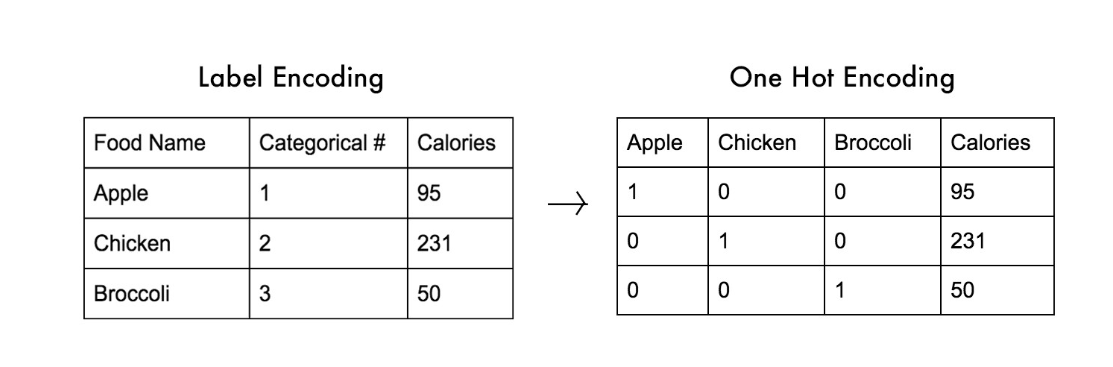

In [279]:
df2=pd.get_dummies(df2,dummy_na=True )

In [281]:
df2.head()

loan_amnt  int_rate  installment  annual_inc  verification_status    dti  \
0     5000.0    0.1065       162.87     24000.0                    1  27.65   
1     2500.0    0.1527        59.83     30000.0                    1   1.00   
2     2400.0    0.1596        84.33     12252.0                    0   8.72   
3    10000.0    0.1349       339.31     49200.0                    1  20.00   
4     3000.0    0.1269        67.79     80000.0                    1  17.94   

   delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  \
0          0.0             1.0                     NaN       3.0      0.0   
1          0.0             5.0                     NaN       3.0      0.0   
2          0.0             2.0                     NaN       2.0      0.0   
3          0.0             1.0                    35.0      10.0      0.0   
4          0.0             0.0                    38.0      15.0      0.0   

   revol_bal  revol_util  total_acc  policy_code  pub_rec_bankruptcies  \
0    13648.0       0.837        9.0          1.0                   0.0   
1     1687.0       0.094        4.0          1.0                   0.0   
2     2956.0       0.985       10.0          1.0                   0.0   
3     5598.0       0.210       37.0          1.0                   0.0   
4    27783.0       0.539       38.0          1.0                   0.0   

   target  term_36 months  term_60 months  term_nan  grade_A  grade_B  \
0       0               1               0         0        0        1   
1       1               0               1         0        0        0   
2       0               1               0         0        0        0   
3       0               1               0         0        0        0   
4       0               0               1         0        0        1   

   grade_C  grade_D  grade_E  grade_F  grade_G  grade_nan  \
0        0        0        0        0        0          0   
1        1        0        0        0        0          0   
2        1        0        0        0        0          0   
3        1        0        0        0        0          0   
4        0        0        0        0        0          0   

   home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  \
0                        0                    0                     0   
1                        0                    0                     0   
2                        0                    0                     0   
3                        0                    0                     0   
4                        0                    0                     0   

   home_ownership_OWN  home_ownership_RENT  home_ownership_nan  addr_state_AK  \
0                   0                    1                   0              0   
1                   0                    1                   0              0   
2                   0                    1                   0              0   
3                   0                    1                   0              0   
4                   0                    1                   0              0   

   addr_state_AL  addr_state_AR  addr_state_AZ  addr_state_CA  addr_state_CO  \
0              0              0              1              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              1              0   
4              0              0              0              0              0   

   addr_state_CT  addr_state_DC  addr_state_DE  addr_state_FL  addr_state_GA  \
0              0              0              0              0              0   
1              0              0              0              0              1   
2              0              0              0              0              0   
3              0              0              0              0              0   
4      

###### 2.8 Missing value imputation

In [282]:
missing=missing_values_table(df2)
missing

Missing Values  % of Total Values
mths_since_last_delinq           25727          64.663449
revol_util                          50           0.125672
pub_rec_bankruptcies               697           1.751873

In [283]:
df2['pub_rec_bankruptcies'].fillna(value=0,inplace=True)

Practice:
1. impute 0 for ['revol_util']'s missing values
1. impute 0 for ['mths_since_last_delinq']'s missing values 

In [285]:
# Check again:
missing=missing_values_table(df2)
missing

Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

Backup the dataset:

## Step Three: ML Modelling

###### 3.1 Check Correlations

In [287]:
correlations = final.corr()['target'].dropna().sort_values(ascending = False)

In [288]:
# Display correlations
print('Top Positive Correlations:\n', correlations.head(15))
print('\nTop Negative Correlations:\n', correlations.tail(15))

Top Positive Correlations:
 target                  1.000000
int_rate                0.197918
term_60 months          0.149151
revol_util              0.095925
grade_E                 0.088464
grade_D                 0.078370
grade_F                 0.077362
inq_last_6mths          0.071325
pub_rec                 0.050927
loan_amnt               0.050035
pub_rec_bankruptcies    0.047140
grade_G                 0.044960
dti                     0.041984
verification_status     0.038998
grade_C                 0.035708
Name: target, dtype: float64

Top Negative Correlations:
 addr_state_OH             -0.007789
addr_state_VA             -0.008817
open_acc                  -0.010199
addr_state_NY             -0.010491
addr_state_MA             -0.012153
addr_state_WY             -0.012336
addr_state_PA             -0.012936
addr_state_DC             -0.015234
addr_state_TX             -0.019222
total_acc                 -0.022640
home_ownership_MORTGAGE   -0.024870
annual_inc             

##### 3.2 Split into Test and Train datasets

In [289]:
x=final.drop(columns='target')
y=final['target']

In [290]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(29839, 84)
(29839,)
(9947, 84)
(9947,)


###### 3.3 Logistic regression model

1.Create the classifier(object)

In [291]:
logist= LogisticRegression()

2.Train the model on training data

In [292]:
logist.fit(x_train, y_train)

C:\Users\kangd\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

3.Make the prediction:

Now that the model has been trained, we can use it to make predictions. 

We want to predict the probabilities of not paying a loan, so we use the model **predict_proba** method.

The first column is the probability of the target being 0 and the second column is the probability of the target being 1

In [293]:
log_reg_pred = logist.predict_proba(x_test)
y_pred_proba=log_reg_pred[:,1]
y_pred_proba

array([0.06427252, 0.21114479, 0.20219843, ..., 0.23903291, 0.14083678,
       0.15619441])

Predict the label:

**.predict()** is for predicting class labels:

scikit-learn is using a threshold of P>0.5 for binary classifications

In [294]:
y_pred = logist.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Get the coefficient list:

In [295]:
coefficients = pd.concat([pd.DataFrame(list(x_train.columns)),pd.DataFrame(np.transpose(logist.coef_))], axis = 1)
coefficients

0             0
0                 loan_amnt  9.078025e-05
1                  int_rate -1.011420e-04
2               installment -2.879396e-03
3                annual_inc -1.473109e-05
4       verification_status -6.520531e-04
5                       dti -2.918580e-02
6               delinq_2yrs  2.184180e-04
7            inq_last_6mths  6.570238e-04
8    mths_since_last_delinq  1.756380e-03
9                  open_acc -1.531794e-02
10                  pub_rec  2.673521e-04
11                revol_bal  1.407352e-05
12               revol_util -4.364776e-04
13                total_acc -2.523854e-02
14              policy_code -3.187937e-03
15     pub_rec_bankruptcies  2.072346e-04
16           term_36 months -4.095676e-03
17           term_60 months  9.077389e-04
18                 term_nan  0.000000e+00
19                  grade_A -2.967104e-03
20                  grade_B -1.806955e-03
21                  grade_C -2.801213e-04
22                  grade_D  6.199176e-04
23                  grade_E  6.769915e-04
24                  grade_F  4.308643e-04
25                  grade_G  1.384703e-04
26                grade_nan  0.000000e+00
27  home_ownership_MORTGAGE -5.982087e-04
28      home_ownership_NONE -1.612167e-06
29     home_ownership_OTHER  8.688087e-06
30       home_ownership_OWN -4.295693e-04
31      home_ownership_RENT -2.167235e-03
32       home_ownership_nan  0.000000e+00
33            addr_state_AK  9.669150e-06
34            addr_state_AL -5.552792e-05
35            addr_state_AR -3.540866e-05
36            addr_state_AZ -6.923154e-05
37            addr_state_CA -1.584872e-04
38            addr_state_CO -1.213171e-04
39            addr_state_CT -8.180764e-05
40            addr_state_DC -4.512054e-05
41            addr_state_DE -1.176180e-05
42            addr_state_FL -9.447212e-05
43            addr_state_GA -5.010783e-05
44            addr_state_HI -3.016635e-06
45            addr_state_IA -2.284777e-06
46            addr_state_ID -6.211858e-07
47            addr_state_IL -1.730140e-04
48            addr_state_IN -6.944285e-06
49            addr_state_KS -5.829414e-05
50            addr_state_KY -3.242295e-05
51            addr_state_LA -4.780571e-05
52            addr_state_MA -1.847414e-04
53            addr_state_MD -1.649874e-05
54            addr_state_ME -3.481708e-06
55            addr_state_MI -6.808459e-05
56            addr_state_MN -1.017569e-04
57            addr_state_MO -1.068972e-05
58            addr_state_MS -7.823957e-06
59            addr_state_MT -1.985288e-05
60            addr_state_NC -7.329911e-05
61            addr_state_NE  7.438667e-06
62            addr_state_NH -5.505732e-06
63            addr_state_NJ -2.827810e-05
64            addr_state_NM -1.705663e-05
65            addr_state_NV  8.135039e-05
66            addr_state_NY -4.139893e-04
67            addr_state_OH -2.110165e-04
68            addr_state_OK -4.447842e-05
69            addr_state_OR -3.854444e-05
70            addr_state_PA -2.402514e-04
71            addr_state_RI -2.510772e-05
72            addr_state_SC -5.447125e-05
73            addr_state_SD -9.700658e-06
74            addr_state_TN -2.348503e-06
75            addr_state_TX -3.184301e-04
76            addr_state_UT -6.113451e-06
77            addr_state_VA -1.517142e-04
78            addr_state_VT -1.315063e-05
79            addr_state_WA -6.158053e-05
80            addr_state_WI -4.238535e-05
81            addr_state_WV -4.553359e-05
82            addr_state_WY -2.286336e-05
83           addr_state_nan  0.000000e+00

**Check key metrics**

An **ROC curve** is a plot of True Positive Rate vs False Positive Rate where False Positive Rate=FP/(TN+FP) =1-Specificity.

4.Show the ROC_CURVE to evaluate the model performance

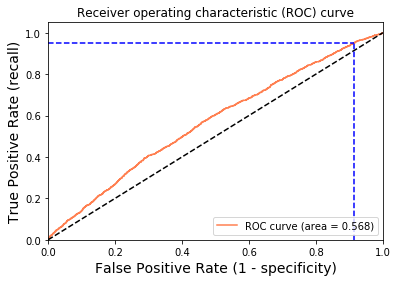

In [296]:
import numpy as np
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
idx = np.min(np.where(tpr > 0.95))  # index of the first threshold for which the sensibility > 0.95
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

**AUROC** (Area Under the Receiver Operating Characteristics)
The more the area enclosed by the ROC curve, the better it is. The area under the curve can lie between 0 and 1. The closer it is to 1, the better it is

###### 3.4 Random Forest

**Ensemble learning**, in general, is a model that makes predictions based on a number of different models. By combining individual models, the ensemble model tends to be more flexible (less bias) and less data-sensitive (less variance)
Two most popular ensemble methods are bagging and boosting.

**Bagging**: Training a bunch of individual models in a parallel way. Each model is trained by a random subset of the data => bootstrapping the data plus using the aggregate to make a decision is called bagging!

- **Random forest** is an ensemble model using bagging as the ensemble method and decision tree as the individual model.

**Boosting**: Training a bunch of individual models in a sequential way. Each individual model learns from mistakes made by the previous model

- **Gradient Boosting**: GBT build trees one at a time, where each new tree helps to correct errors made by previously trained tree. GBT build trees one at a time, where each new tree helps to correct errors made by previously trained tree.

Practice:

1.Create the classifier(object):

In [297]:
rf_model = RandomForestClassifier(
   n_estimators=200,
    max_depth=5)

2.Train the model on training data:

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

3.Make the prediction:

array([0.10396084, 0.11914829, 0.16695168, ..., 0.25078187, 0.08173592,
       0.10173337])

4.Show the ROC_CURVE to evaluate the model performance:

Get the feature importances for each feature using the following code:

In [301]:
rf_model.feature_importances_

array([2.38492024e-02, 2.60163985e-01, 2.10625605e-02, 5.92743625e-02,
       2.60659431e-03, 1.88557612e-02, 4.98667037e-03, 2.49297986e-02,
       1.06189103e-02, 1.36103302e-02, 1.39775128e-02, 1.55450176e-02,
       5.07950373e-02, 1.60533853e-02, 0.00000000e+00, 8.87393061e-03,
       1.14735943e-01, 9.30782403e-02, 0.00000000e+00, 7.66927769e-02,
       1.88820388e-02, 8.69522566e-03, 2.75365129e-02, 3.62041117e-02,
       2.67551701e-02, 6.64845532e-03, 0.00000000e+00, 4.12878822e-03,
       0.00000000e+00, 4.91088320e-04, 5.91332669e-04, 2.69618450e-03,
       0.00000000e+00, 5.07148722e-04, 5.88936838e-04, 5.30328415e-04,
       8.17864842e-04, 2.66880222e-03, 6.14108775e-04, 7.51922057e-04,
       6.38700507e-04, 3.55431601e-04, 2.71022130e-03, 9.30846363e-04,
       3.85165026e-04, 0.00000000e+00, 1.18007816e-04, 1.31223966e-03,
       0.00000000e+00, 8.13204533e-04, 5.78721381e-04, 6.74247315e-04,
       7.32259599e-04, 5.67539374e-04, 0.00000000e+00, 7.52574766e-04,
      

Associate these feature importances with the corresponding features:

In [302]:
feature_importance_df = pd.DataFrame(list(zip(rf_model.feature_importances_, list(x_train.columns))))
feature_importance_df.columns = ['feature.importance', 'feature']
feature_importance_df.sort_values(by='feature.importance', ascending=False).head(20) # only show top 20

feature.importance                 feature
1             0.260164                int_rate
16            0.114736          term_36 months
17            0.093078          term_60 months
19            0.076693                 grade_A
3             0.059274              annual_inc
12            0.050795              revol_util
23            0.036204                 grade_E
22            0.027537                 grade_D
24            0.026755                 grade_F
7             0.024930          inq_last_6mths
0             0.023849               loan_amnt
2             0.021063             installment
20            0.018882                 grade_B
5             0.018856                     dti
13            0.016053               total_acc
11            0.015545               revol_bal
10            0.013978                 pub_rec
9             0.013610                open_acc
8             0.010619  mths_since_last_delinq
15            0.008874    pub_rec_bankruptcies